In [ ]:
import pandas as pd
import math

import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv("/content/house_price_prediction.csv") # /content/house_price_prediction.csv

In [ ]:
df.describe()
#to show and analyse data

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.721000e+04,1.721000e+04,17210.000000,17210.000000,1.721000e+04,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000
mean,4.584539e+09,5.391069e+05,3.373213,2080.172051,1.513545e+04,1.498605,0.008077,3.409587,7.661941,1788.108077,292.063974,1971.285880,84.305985,98077.903661,47.559731,-122.213991,1987.480244,12785.612028
std,2.874471e+09,3.674218e+05,0.927616,917.995097,4.260361e+04,0.542192,0.089509,0.646909,1.170044,824.994890,443.397892,29.378191,401.454725,53.554500,0.138973,0.140486,684.866281,27294.470122
min,1.000102e+06,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125570e+09,3.200000e+05,3.000000,1420.000000,5.034000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.468925,-122.328000,1490.000000,5100.000000
50%,3.904980e+09,4.500000e+05,3.000000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.308600e+09,6.400000e+05,4.000000,2550.000000,1.070075e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678175,-122.125000,2368.250000,10092.000000
max,9.900000e+09,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# Feature Engineering

In [ ]:
#New features that we can introduce:::::>

#Age of home
#Month of sell(Festivity)
#year of sell
#increase or decrease in sqft living and lot after renovation
#distance from center of city --> home with max price
#Percentage of living from the lot=====> Privacy Index
#avg area per room
#price / sqft_living , price / sqft_lot 
#price / bedroom
#avg area per floor
#terrace ==> if 0.5 floor
#bedroom per / floor --> round it off
#convert zipcodes based on frequency of occurrence :: frequency encoding
#

# Verify Missing value presence

In [ ]:
df.isnull().sum().sum()

0

## Find lat long of home which has maximum price

In [ ]:
df.loc[df['price'] == df['price'].max(), ['lat','long']]

,lat,long
17201,47.6298,-122.323


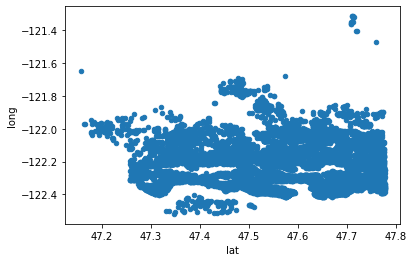

In [ ]:
df[['lat','long']].plot(x= 'lat', y= 'long', kind='scatter')

#### Find distance of every house from the house with maximum price

###### Method 1

In [ ]:
import numpy as np
center = df.loc[df['price'] == df['price'].max(), ['lat','long']].values
df_new = df[['lat','long']] - center #47.6298	-122.323
df['distance'] = np.sqrt((df_new**2).sum(axis=1))

In [ ]:
df_new

,lat,long
0,-0.4216,0.328
1,-0.1420,0.193
2,-0.3339,-0.054
3,-0.1009,0.290
4,-0.2798,0.001
...,...,...
17205,0.1036,-0.039
17206,-0.0009,0.090
17207,0.0997,-0.049
17208,-0.0821,0.197


In [ ]:
df['distance']

0        0.534163
1        0.239610
2        0.338238
3        0.307052
4        0.279802
           ...   
17205    0.110698
17206    0.090004
17207    0.111090
17208    0.213423
17209    0.103231
Name: distance, Length: 17210, dtype: float64

##### Method 2

In [ ]:
center = df.loc[df['price'] == df['price'].max(), ['lat','long']]
df['dist'] = np.sqrt(((df['lat'] - center['lat'].values)**2) + ((df['long'] - center['long'].values)**2))

In [ ]:
df['dist']

0        0.534163
1        0.239610
2        0.338238
3        0.307052
4        0.279802
           ...   
17205    0.110698
17206    0.090004
17207    0.111090
17208    0.213423
17209    0.103231
Name: dist, Length: 17210, dtype: float64

# Age of the House

date column is date when the house is sold.

from date column extract the year.

age = sold_date_year - yr_built

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
distance                float64
dtype: object

In [ ]:
df['home_age'] = df['date'].dt.year - df['yr_built']

In [ ]:
df['home_age'].describe()

count    17210.000000
mean        43.030854
std         29.376780
min         -1.000000
25%         17.000000
50%         39.000000
75%         63.000000
max        115.000000
Name: home_age, dtype: float64

In [ ]:
df['yr_built'].describe()

count    17210.000000
mean      1971.285880
std         29.378191
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

#### Observations from Age of the house

1. There are some houses which are under construction and still were sold

2. There are 25% houses where age is greater than 63 yrs

## Final columns in the data

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'distance', 'home_age'],
      dtype='object')

## Remove few unneccessary columns

- id

- date

- zipcode

- lat

- long

- sqft_living

- sqft_lot

- yr_renovated

- yr_built



In [ ]:
df = df.drop(['id','date','zipcode','lat','long','sqft_living','sqft_lot','yr_renovated','yr_built'],axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'distance', 'home_age'],
      dtype='object')

In [ ]:
df.shape

(17210, 12)

# Format the Target Variable 

In [ ]:
df['price'].describe()

count    1.721000e+04
mean     5.391069e+05
std      3.674218e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

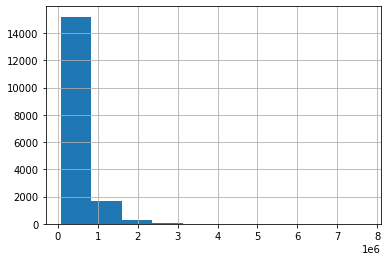

In [ ]:
df['price'].hist()

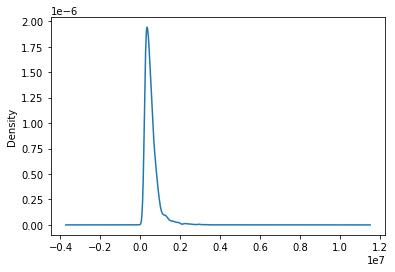

In [ ]:
df['price'].plot.kde()

## Observation about Target Variable

- Histogram and KDE plot shows right skeness of the data

- Std dev of the values in Target is very high

## Conclusion

### APPLY log transform on target ALSO when giving predictions from the model do ANTI-LOG of the prediction

# NOTE of CAUTION: 

### LOG changes the distribution of the feature or DATA. SO, use it carefully!!

In [ ]:
df['log_price'] = np.log(df['price'])

In [ ]:
df['log_price'].describe()

count    17210.000000
mean        13.044580
std          0.528797
min         11.264464
25%         12.676076
50%         13.017003
75%         13.369223
max         15.856731
Name: log_price, dtype: float64

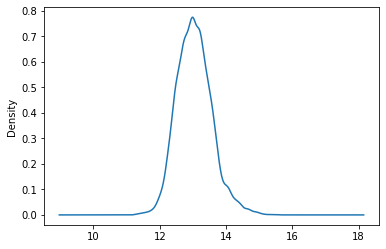

In [ ]:
df['log_price'].plot.kde()

In [ ]:
df = df.drop(['price'],axis=1)

In [ ]:
df.dtypes

bedrooms           int64
floors           float64
waterfront         int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
sqft_living15      int64
sqft_lot15         int64
distance         float64
home_age           int64
log_price        float64
dtype: object

# Split the data

In [ ]:
X = df.drop('log_price',axis=1)
Y = df['log_price']

In [ ]:
X.shape,Y.shape

((17210, 11), (17210,))

In [ ]:
from sklearn.model_selection import train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=7)

# Feature selection

## Correlation

In [ ]:
df.columns

Index(['bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'distance', 'home_age',
       'log_price'],
      dtype='object')

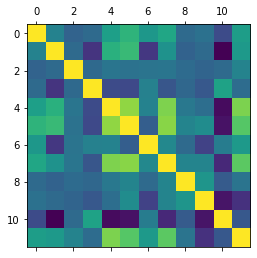

<Figure size 720x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
corr = df.corr()
corr_target = abs(corr['log_price'])

In [ ]:
corr_target

bedrooms         0.341157
floors           0.312479
waterfront       0.178585
condition        0.034641
grade            0.704888
sqft_above       0.604823
sqft_basement    0.316919
sqft_living15    0.624393
sqft_lot15       0.085060
distance         0.279261
home_age         0.080314
log_price        1.000000
Name: log_price, dtype: float64

# RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dt = DecisionTreeRegressor( random_state=7)

In [ ]:
rfe = RFE(estimator=model_dt, n_features_to_select=1, step=1)

In [ ]:
rfe.fit(X_train,Y_train)

RFE(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                    max_depth=None, max_features=None,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    presort='deprecated', random_state=7,
                                    splitter='best'),
    n_features_to_select=1, step=1, verbose=0)

In [ ]:
for rank, col in sorted(zip(rfe.ranking_,X.columns)):
    print(rank, col)

1 distance
2 grade
3 sqft_living15
4 sqft_above
5 home_age
6 sqft_lot15
7 sqft_basement
8 condition
9 bedrooms
10 waterfront
11 floors


# PCA

In [ ]:
from sklearn.decomposition import PCA# Make an instance of the Model
# Principle COmponent Analysis
pca = PCA(0.99) 
pca.fit(X_train)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print(X_train_new.shape)
X_train_new[:5]

(12047, 1)


array([[ 26218.74076698],
       [ 24847.14575404],
       [ -8348.28177938],
       [ -8429.43994951],
       [-11145.03326299]])

# LASSO (Least Absolute Shrinkage and Selection Operator)

- L1 regularization

- We reduce the coefficients of the features to 0

- total error = squared error + alpha * sum(abs(coefficients))

- alpha value controls the number of features

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.27973787e-02,  3.11918366e-04,  3.00541681e-04,  2.03216683e-04,
       -1.26203921e-06, -0.00000000e+00,  3.25055712e-03])

In [ ]:
selected_features = X_train.columns[lasso.coef_ > 0 ]

In [ ]:
selected_features

Index(['grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'home_age'], dtype='object')

In [ ]:
X_train_lasso = X_train.loc[:,['grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'home_age']]
X_test_lasso = X_test.loc[:,['grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'home_age']]

### Note if increase the alpha value more features will be eleminated

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, Y_train)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.12965928e-04,  3.09037794e-04,  2.06560008e-04,
       -1.26950516e-06, -0.00000000e+00,  2.58122955e-03])

In [ ]:
selected_features = X_train.columns[lasso.coef_ > 0 ]

In [ ]:
selected_features

Index(['sqft_above', 'sqft_basement', 'sqft_living15', 'home_age'], dtype='object')

# RIDGE Regression L2 regularization

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)
ridge.fit(X_train,Y_train)
ridge.coef_

array([-1.78066713e-02,  1.01176125e-01,  4.09176531e-02,  3.31608342e-02,
        1.81563408e-01,  1.70940886e-04,  2.44069866e-04,  1.39770120e-04,
       -5.04687121e-07, -1.62562476e-01,  4.62091175e-03])

### Change alpha with high value to make impact

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2000)
ridge.fit(X_train,Y_train)
ridge.coef_

array([-1.83231915e-02,  8.10883928e-02,  2.16559875e-02,  2.61112915e-02,
        1.61043701e-01,  1.92999153e-04,  2.54646822e-04,  1.45741023e-04,
       -6.88484459e-07, -8.99929614e-02,  4.53623526e-03])

In [ ]:
Y_pred_ridge = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_ridge)

0.09746917033513311

# Apply Regression Algorithms

- Random Forest Regressor

- Adaboost Regressor

## Take Complete Data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [ ]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [ ]:
Y_pred_rfr = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_rfr)

0.05225349912104584

## Take 5 features from RFE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [ ]:
X_train_rfe = X_train.loc[:, ['distance', 'grade', 
                              'sqft_living15', 'sqft_above', 
                              'home_age']]
X_test_rfe = X_test.loc[:, ['distance', 'grade', 
                              'sqft_living15', 'sqft_above', 
                              'home_age']]

In [ ]:
rfr.fit(X_train_rfe,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [ ]:
Y_pred_rfr = rfr.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_rfr)

0.0628991506566112

## Take PCA component for Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [ ]:
rfr.fit(X_train_new,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [ ]:
Y_pred_rfr = rfr.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_rfr)

0.34582900361130237

# Apply RFR on Lasso selected features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [ ]:
rfr.fit(X_train_lasso,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [ ]:
Y_pred_rfr = rfr.predict(X_test_lasso)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_rfr)

0.09477234012320392

# Directly predict using LASSO

- It is not efficient 

- Random forest regressor is more efficient than LASSO regressor

In [ ]:
Y_pred_lasso = lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_lasso)

0.1290621776290484